This is model from the v3 split dataset

By the end of this file
1) v3_label_encoder is saved in "../models/"
2) csv file with th original test_v3 df with prediction

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# for Tina machine only, to import .py from src/ds/
import os
current_workpath = os.getcwd()
print("Current workpath:", current_workpath)

parent_folder = os.path.dirname(current_workpath)
print("Parent_folder:", parent_folder)

import sys
sys.path.append(parent_folder+'/src')
print(sys.path[-1])

Current workpath: /home/tina4aiml/dev/notebooks
Parent_folder: /home/tina4aiml/dev
/home/tina4aiml/dev/src


In [75]:
rawfile_name = 'beer_reviews'
rawfile_format = '.csv'
rawfile_path = "../data/raw/"

interim_folder_path = "../data/interim/"
processed_folder_path  ="../data/processed/"
external_folder_path  ="../data/external/"
model_folder_path = "../models/"

# import data

In [4]:
import pandas as pd
import numpy as np

In [5]:
from ds.data.sets import load_sets_v2

In [6]:
X_train_v3, y_train_v3, X_val_v3, y_val_v3, X_test_v3, y_test_v3 = load_sets_v2(path='../data/processed/', suffix='_v3')

In [7]:
# Check if the datasets were loaded successfully
if X_train_v3 is not None:
    print("X_train_v3 shape:", X_train_v3.shape) # (951968, 6)
else:
    print("X_train_v3 file not found")

if y_train_v3 is not None:
    print("y_train_v3 shape:", y_train_v3.shape) #(951968,)
else:
    print("y_train_v3 file not found") 

if X_val_v3 is not None:
    print("X_val_v3 shape:", X_val_v3.shape) # (317323, 6)
else:
    print("X_val_v3 file not found")

if y_val_v3 is not None:
    print("y_val_v3 shape:", y_val_v3.shape) # (317323,)
else:
    print("y_val_v3 file not found")

if X_test_v3 is not None:
    print("X_test_v3 shape:", X_test_v3.shape) # (317323, 6)
else:
    print("X_test_v3 file not found")

if y_test_v3 is not None:
    print("y_test_v3 shape:", y_test_v3.shape) # (317323,)
else:
    print("y_test_v3 file not found")

X_train_v3 shape: (951968, 6)
y_train_v3 shape: (951968,)
X_val_v3 shape: (317323, 6)
y_val_v3 shape: (317323,)
X_test_v3 shape: (317323, 6)
y_test_v3 shape: (317323,)


# Encode target

In [8]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the training set
label_encoder.fit(y_train_v3)

# Save the LabelEncoder
joblib.dump(label_encoder, model_folder_path+'v3_label_encoder.joblib')

# Transform the target variables
y_train_v3_encoded = label_encoder.transform(y_train_v3).astype(int)
y_val_v3_encoded = label_encoder.transform(y_val_v3).astype(int)
y_test_v3_encoded = label_encoder.transform(y_test_v3).astype(int)

In [9]:
X_train_v3 = X_train_v3.astype(float)
X_val_v3 = X_val_v3.astype(float)
X_test_v3 = X_test_v3.astype(float)

In [10]:
#both need to be int
print(y_train_v3_encoded.dtype)
print(X_train_v3.dtype)

int64
float64


# define Neural Network Architecture

In [11]:
features_names = np.load(processed_folder_path+'features_label.npy',allow_pickle=True)
features_names_n = len(features_names)
features_names_n 

6

In [12]:
target_class = np.load(processed_folder_path+'beer_style.npy',allow_pickle=True)
target_class_n = len(target_class)
target_class_n 

104

In [13]:
import tensorflow as tf

tf.keras.utils.set_random_seed(1)

input_shape = (features_names_n,)
num_classes = target_class_n

2023-07-08 02:06:07.012022: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-08 02:06:07.055062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
## callback that will decrease the learning rate by a factor of 0.2 if the model doesn't improve after 5 epochs
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0000001)

In [15]:
v3NN_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

v3NN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


2023-07-08 02:06:08.491709: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-08 02:06:08.498349: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-08 02:06:08.498707: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-08 02:06:08.501617: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-08 02:06:08.501831: I tensorflow/compile

In [16]:
v3NN_history = v3NN_model.fit(
                          X_train_v3, 
                          y_train_v3_encoded, 
                          epochs=10, batch_size=32, 
                          validation_data=(X_val_v3, y_val_v3_encoded),    
                          callbacks = [        
                            EarlyStopping(
                            monitor='val_loss',
                            patience=5,
                            restore_best_weights=True
                            ),
                            reduce_lr
                        ] )

Epoch 1/10


2023-07-08 02:06:10.889940: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-08 02:06:10.891730: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f1886e72f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-08 02:06:10.891772: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-07-08 02:06:10.896116: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-08 02:06:11.041373: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-08 02:06:11.159910: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifeti

29749/29749 [==============================] - 121s 4ms/step - loss: 3.3922 - accuracy: 0.1795 - val_loss: 3.2011 - val_accuracy: 0.2040 - lr: 0.0010
Epoch 2/10
29749/29749 [==============================] - 120s 4ms/step - loss: 3.1809 - accuracy: 0.2114 - val_loss: 3.1407 - val_accuracy: 0.2220 - lr: 0.0010
Epoch 3/10
29749/29749 [==============================] - 117s 4ms/step - loss: 3.1381 - accuracy: 0.2196 - val_loss: 3.1191 - val_accuracy: 0.2231 - lr: 0.0010
Epoch 4/10
29749/29749 [==============================] - 114s 4ms/step - loss: 3.1138 - accuracy: 0.2239 - val_loss: 3.1029 - val_accuracy: 0.2230 - lr: 0.0010
Epoch 5/10
29749/29749 [==============================] - 116s 4ms/step - loss: 3.0966 - accuracy: 0.2275 - val_loss: 3.0986 - val_accuracy: 0.2245 - lr: 0.0010
Epoch 6/10
29749/29749 [==============================] - 119s 4ms/step - loss: 3.0854 - accuracy: 0.2301 - val_loss: 3.0744 - val_accuracy: 0.2302 - lr: 0.0010
Epoch 7/10
29749/29749 [=====================

In [17]:
joblib.dump(v3NN_model, model_folder_path+'v3NN_model.joblib')

['../models/v3NN_model.joblib']

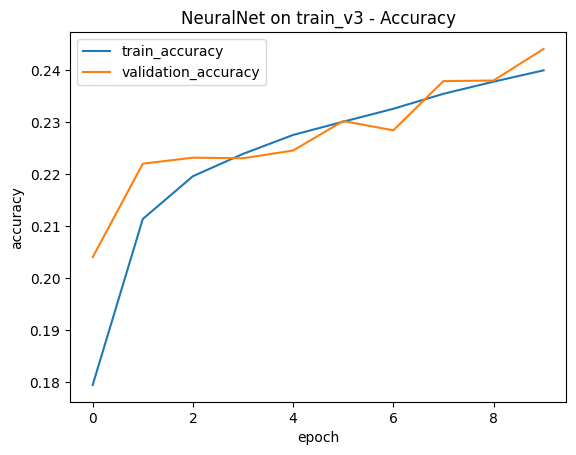

In [18]:
# 1) plot performance on train set
from ds.visualization.visualize import plot_model_accuracy, plot_model_loss

plot_model_accuracy(v3NN_history.history,'NeuralNet on train_v3 - Accuracy')

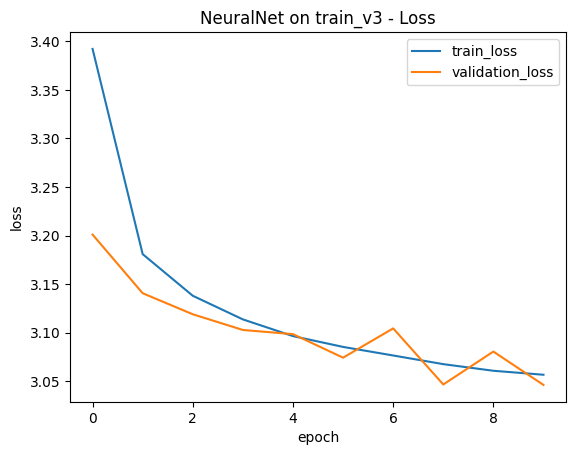

In [19]:
plot_model_loss(v3NN_history.history,'NeuralNet on train_v3 - Loss')

# 2) Get Accuracy on test_set

In [20]:
y_test_v3_pred_probs = v3NN_model.predict(X_test_v3)
y_test_v3_pred = y_test_v3_pred_probs.argmax(axis=1)
y_test_v3_pred


9917/9917 [==============================] - 14s 1ms/step


array([98,  9, 16, ..., 12, 12, 98])

In [21]:
from sklearn.metrics import accuracy_score
v3NN_model_test_accuracy = accuracy_score(y_test_v3_encoded, y_test_v3_pred)

In [22]:
print(f"Test Set Accuracy: {v3NN_model_test_accuracy} or {v3NN_model_test_accuracy:.2%}")

Test Set Accuracy: 0.24343334709428563 or 24.34%


In [23]:
# Load the saved LabelEncoder
label_encoder = joblib.load(model_folder_path+'v3_label_encoder.joblib')

# Revert the encoded labels back to their original text form
y_test_v3_pred_decoded = label_encoder.inverse_transform(y_test_v3_pred)
y_test_v3_pred_decoded

array(['Tripel', 'American Double / Imperial IPA',
       'American Pale Wheat Ale', ..., 'American IPA', 'American IPA',
       'Tripel'], dtype=object)

# Assemble back to df

In [24]:
y_test_v3_pred_decoded_= y_test_v3_pred_decoded.reshape((-1, 1))

In [25]:
scaler= joblib.load(model_folder_path+'scaler.joblib')

In [26]:
X_test_v3_with_labels = np.concatenate((X_test_v3, y_test_v3_pred_decoded_), axis=1)
X_test_v3_with_labels

array([[17.0, 0.37895307633066627, 1.8801692312893206, ...,
        0.9660780406683259, 0.8614848722814252, 'Tripel'],
       [248.0, 0.37895307633066627, 1.0686028847673665, ...,
        0.282989356641999, 1.521588348054741,
        'American Double / Imperial IPA'],
       [272.0, -0.33777308136316325, -0.5545298082765412, ...,
        0.9660780406683259, -0.546735876034982,
        'American Pale Wheat Ale'],
       ...,
       [538.0, 0.37895307633066627, 0.2570365382454127, ...,
        0.9660780406683259, 0.1573744981232218, 'American IPA'],
       [394.0, -0.33777308136316325, -0.5545298082765412, ...,
        -0.40009932738432796, -0.018653095416329254, 'American IPA'],
       [17.0, 0.37895307633066627, -0.5545298082765412, ...,
        0.282989356641999, 0.8614848722814252, 'Tripel']], dtype=object)

In [27]:
features_names

array(['brewery_name', 'review_aroma', 'review_appearance',
       'review_palate', 'review_taste', 'beer_abv'], dtype='<U17')

In [71]:
df_X_test_v3_unencoded = pd.read_pickle(interim_folder_path + 'df_X_test_v3_unencoded.pkl')

In [72]:
df_X_test_v3_unencoded

,brewery_name,review_aroma,review_appearance,review_palate,review_taste,beer_abv
372797,Unibroue,4.0,5.0,4.0,4.5,9.0
942896,"Bell's Brewery, Inc.",4.0,4.5,5.0,4.0,10.5
1152395,Arcadia Brewing Company,3.5,3.5,3.0,4.5,5.8
410631,Tröegs Brewing Company,4.5,4.0,4.5,4.5,7.5
699913,Boulder Beer / Wilderness Pub,3.5,4.0,3.0,2.5,5.94
...,...,...,...,...,...,...
1126739,Miller Brewing Co.,2.0,2.0,3.0,1.5,4.66
101744,Hale's Ales Brewery & Pub,4.0,4.0,4.0,4.0,NaN
690490,Bayerische Staatsbrauerei Weihenstephan,4.0,4.0,4.0,4.5,7.4
554111,Summit Brewing Company,3.5,3.5,4.0,3.5,7.0


In [73]:
df_X_test_v3_unencoded['prediction'] = y_test_v3_pred_decoded

In [74]:
df_X_test_v3_unencoded

,brewery_name,review_aroma,review_appearance,review_palate,review_taste,beer_abv,prediction
372797,Unibroue,4.0,5.0,4.0,4.5,9.0,Tripel
942896,"Bell's Brewery, Inc.",4.0,4.5,5.0,4.0,10.5,American Double / Imperial IPA
1152395,Arcadia Brewing Company,3.5,3.5,3.0,4.5,5.8,American Pale Wheat Ale
410631,Tröegs Brewing Company,4.5,4.0,4.5,4.5,7.5,American Amber / Red Ale
699913,Boulder Beer / Wilderness Pub,3.5,4.0,3.0,2.5,5.94,American IPA
...,...,...,...,...,...,...,...
1126739,Miller Brewing Co.,2.0,2.0,3.0,1.5,4.66,American Adjunct Lager
101744,Hale's Ales Brewery & Pub,4.0,4.0,4.0,4.0,NaN,American IPA
690490,Bayerische Staatsbrauerei Weihenstephan,4.0,4.0,4.0,4.5,7.4,American IPA
554111,Summit Brewing Company,3.5,3.5,4.0,3.5,7.0,American IPA


In [76]:
df_X_test_v3_unencoded.to_csv(external_folder_path+'df_X_test_v3_output.csv', index=True)